# Metric Learning with Self Adjusting Memory for Explaining Feature Drift

This notebook will show you how extending the SAM-kNN algorithm with metric learning, specifically large margin nearest neighbor (lmnn), can give a measure of feature relevancy over time thus giving an easy to read explanation for feature drift occuring in data streams.

## Creating Toy Data with Feature Drift 

In this first part we will show how to create simple toy data sets with different kind of feature drifts.

In [1]:
import numpy as np

data_N = 50000
data_dim = 10
X = []
for i in range(data_N):
    X.append([np.random.uniform(-1, 1) for j in range(data_dim)])
    
# one relevant dimension
y_one_dim = [int(x[0]>=0) for x in X]

We create a 10-dimensional data set where the data in each dimension is uniformly distributed between -1 and 1. As a first basic example we create labels so that only one dimension is relevant for classification. 

In [2]:
# multiple abrupt feature drifts over time
steps = a=range(0,len(X),int(len(X)/10))
y = [int(X[x][0] >= 0) for x in range(0, steps[0])]
y = y + [int(X[x][1] >= 0) for x in range(steps[0], steps[1])]
y = y + [int(X[x][2] >= 0) for x in range(steps[1], steps[2])]
y = y + [int(X[x][3] >= 0) for x in range(steps[2], steps[3])]
y = y + [int(X[x][4] >= 0) for x in range(steps[3], steps[4])]
y = y + [int(X[x][5] >= 0) for x in range(steps[4], steps[5])]
y = y + [int(X[x][6] >= 0) for x in range(steps[5], steps[6])]
y = y + [int(X[x][7] >= 0) for x in range(steps[6], steps[7])]
y = y + [int(X[x][8] >= 0) for x in range(steps[7], steps[8])]
y_abrupt_multiple = y + [int(X[x][9] >= 0) for x in range(steps[8], steps[9])]


def calc_label(X,step):
    x_0 = step
    x_1 = 1-step
    x_2 = 0.0
    x_3 = 0.0
    x_4 = 0.0
    x_5 = 0.0
    x_6 = 0.0
    x_7 = 0.0
    x_8 = 0.0
    x_9 = 0.0
    return int(x_0*X[0]+x_1*X[1] >= 0)


# continous feature drift over time
steps = np.arange(0,1,1/len(X))
y = []
for x in range(len(X)):
    y.append(calc_label(X[x], steps[x]))
y_continous = y

For different examples of feature drift we first, create labels so that multiple instances of abrupt feature drift occur at different timesteps (y_abrupt_multiple). As well as, we create a continous change of relevancy from one dimension to another (y_continous).

## Calculating Relevancies

The SAM-kNN algorithm uses a short- and long-term-memory to be uniquely capable of handling concept drift by adapting to changes in the data over time. In our extension we calculate and apply a metric, lmnn, on all points in the short term memory that optimally arranges the points for kNN clustering. The entries on the diagonal of the resulting distance matrix of lmnn can be used as a measure of feature importance. Thus plotting the importance for features over time gives a way to visualize feature drift.

## Plotting Feature Relevance

Unfortunately training SAM-kNN with lmnn still takes a long time and is not suited for a notebook like this. Instead we will be loading training results. If you are interested in training a model yourself then you can find the SAM-kNN code here: https://github.com/vlosing/SAMkNN.

In [3]:
rels_one = np.loadtxt("relevancies_one")
rels_abrupt_multiple = np.loadtxt("relevancies_abrupt_multiple")
rels_continous = np.loadtxt("relevancies_continous")

When we plot the relevancies for the relevant dimensions over time for our different drift data sets we get the following results:

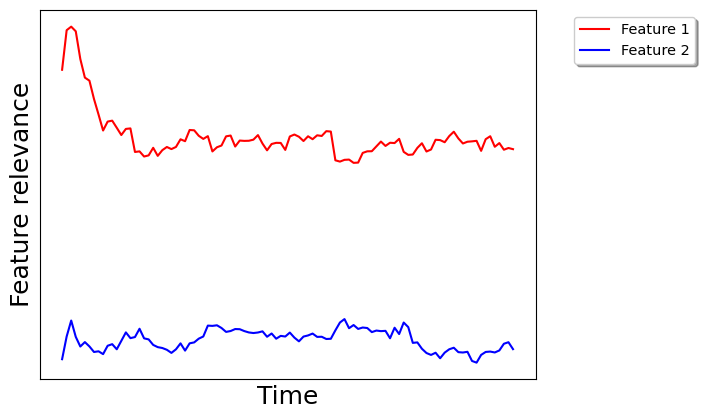

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})


plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.xlabel("Time")
plt.ylabel("Relevancies")


plt.plot([x[0] for x in rels_one], color='r',label="Feature 1")
plt.plot([x[1] for x in rels_one], color='b',label="Feature 2")

plt.xlabel("Time")
plt.ylabel("Feature relevance")
plt.legend(loc='upper center', shadow=True, fontsize='xx-small',bbox_to_anchor=(1.2, 1.00))

plt.show()

For the first data set we clearly see that only one dimension is relevant and relevancy stays fairly stable over time so no feature drift is occuring.

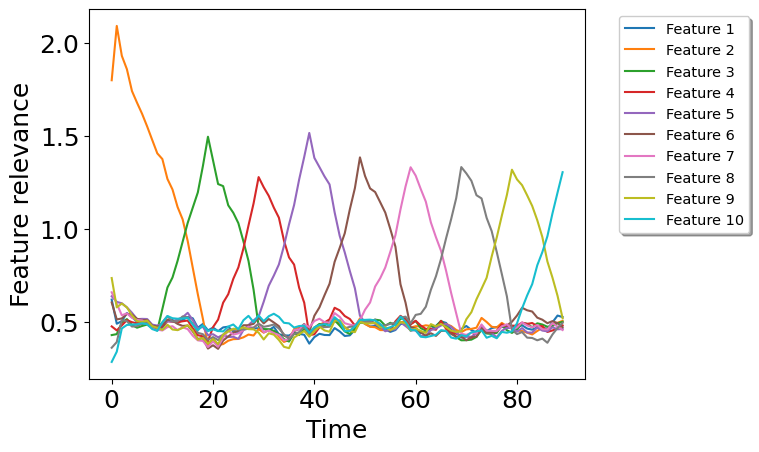

In [23]:
for i in range(np.shape(rels_abrupt_multiple)[1]):
     plt.plot([x[i] for x in rels_abrupt_multiple],label="Feature %.i"%(i+1))

plt.xlabel("Time")
plt.ylabel("Feature relevance")
plt.legend(loc='upper center', shadow=True, fontsize='xx-small',bbox_to_anchor=(1.2, 1.00))

plt.show()

For the data set with abrupt drift occuring at multiple time steps, we see the relevancy switching from feature to feature at the points in time where abrupt feature drift occurs.

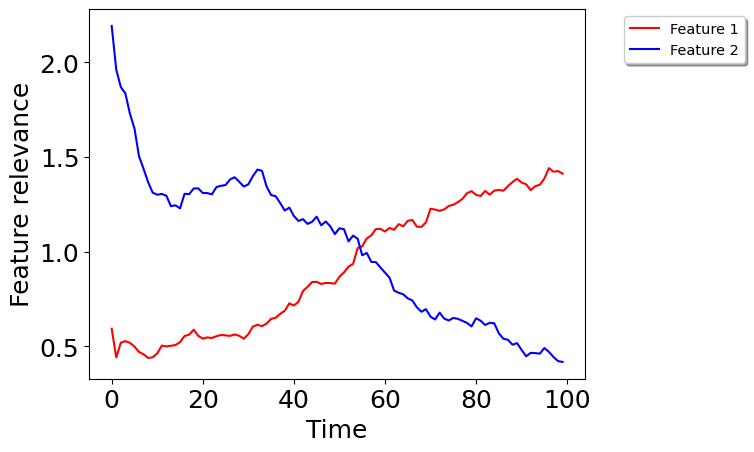

In [24]:
plt.plot([x[0] for x in rels_continous], color='r',label="Feature 1")
plt.plot([x[1] for x in rels_continous], color='b',label="Feature 2")

plt.xlabel("Time")
plt.ylabel("Feature relevance")
plt.legend(loc='upper center', shadow=True, fontsize='xx-small',bbox_to_anchor=(1.2, 1.00))

plt.show()

For the data set with continous drift, we see the relevancies increasing and decreasing respectively over time. We clearly see the continous feature drift occuring.

## Conclusion
SAM-kNN with lmnn extension gives easy to read and understand feature relevancies over time to understand and visualize feature drift.